In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
recalls = pd.read_csv("C:\\Users\\pushp\\recalls_final_clean.csv")
recalls.tail(10)

,Unnamed: 0,index,title,date,hazard,hazard_type,recall_class,audience,distribution,brand,company,product
3994,106,106,Dubon brand Mixed Forest Mushrooms recalled du...,1/20/2023,Extraneous Material,Extraneous Material,Class 3,Retail,Quebec,Dubon,Retail,Mixed forest mushrooms
3995,107,107,Surface-ripened soft and semi-soft cheeses rec...,1/19/2023,Dairy,Dairy,NaN,Class 1,Nationally,NaN,Food - Dairy,To listeria monocytogenes
3996,108,108,Fresh Prep brand Nutty Kale Salad with Goat Ch...,1/19/2023,Fresh,Fruits and vegetables,NaN,Class 2,Online,Fresh Prep,Food - Fruits and vegetables - Fresh,Nutty kale salad with goat cheese and creamy m...
3997,109,109,Summer Fresh brand and Compliments Naturally S...,1/18/2023,Extraneous Material,Extraneous Material,Class 2,Retail,"Alberta, British Columbia, Ontario,Nova Scotia",Summer Fresh,Retail,And compliments naturally simple brand hummus
3998,110,110,La Vache à Maillotte brand Mélo-Dieux – Surfac...,1/16/2023,Dairy,Dairy,NaN,Class 1,Nationally,La Vache à Maillotte,Food - Dairy,Mélo-dieux – surface-ripened soft cheese
3999,111,111,Le Cendré de Notre-Dame brand Semi-soft Surfac...,1/14/2023,Dairy,Dairy,NaN,Class 1,Nationally,Le Cendré de Notre-Dame,Food - Dairy,Semi-soft surface-ripened cheese
4000,112,112,Punjab King brand Pure Honey recalled due to p...,1/13/2023,Contamination,Chemical,Class 3,Retail,"Ontario,Quebec",Punjab King,Retail,Pure honey
4001,113,113,St-Hubert and Cavalier brand Chicken Breast Nu...,1/13/2023,Extraneous Material,Extraneous Material,Class 2,Retail,"Ontario, Quebec,New Brunswick",St-Hubert and Cavalier,Retail,Chicken breast nuggets
4002,114,114,Kirkland Signature brand Four Cheese and Spina...,1/12/2023,Extraneous Material,Extraneous Material,Class 2,Retail,Nationally,Kirkland Signature,Retail,Four cheese and spinach manicotti marinara
4003,115,115,Tohato brand Potato Ring Salty Snack Products ...,1/7/2023,Other,Other,NaN,Class 1,British Columbia,Tohato,Food - Other,Potato ring salty snack products


In [187]:
recalls.shape

(4004, 12)

In [188]:
recalls['date'] = pd.to_datetime(recalls['date'])

#### Extracting subsets for power bi reporting

In [189]:
class_recall = recalls.recall_class.value_counts(normalize=True).head(3).to_frame()
class_recall.head()

,recall_class
Class 1,0.339198
Class 2,0.318241
Class 3,0.317982


In [190]:
class_recall.to_csv('recalls-class.csv')

In [191]:
count_recalls = recalls['date'].dt.year.value_counts().to_frame().reset_index().sort_values('index').reset_index(drop=True)
count_recalls = no_recalls.iloc[:11]

In [192]:
count_recalls 

,index,date
0,2011,403
1,2012,386
2,2013,398
3,2014,547
4,2015,357
5,2016,379
6,2017,305
7,2018,267
8,2019,279
9,2020,212


In [193]:
recalls_2022_2023 = recalls['date'].dt.year.value_counts().to_frame().reset_index()
recalls_2022_2023.columns = ['Year', 'Count']

#adding the yearsc2022 and 2023 and sorting by year
recalls_2022_2023 = recalls_2022_2023.append({'Year': 2022, 'Count': 0}, ignore_index=True)
recalls_2022_2023 = recalls_2022_2023.append({'Year': 2023, 'Count': 0}, ignore_index=True)

recalls_2022_2023 = recalls_2022_2023.sort_values('Year').reset_index(drop=True)


C:\Users\pushp\AppData\Local\Temp\ipykernel_21332\3625277487.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recalls_2022_2023 = recalls_2022_2023.append({'Year': 2022, 'Count': 0}, ignore_index=True)
C:\Users\pushp\AppData\Local\Temp\ipykernel_21332\3625277487.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recalls_2022_2023 = recalls_2022_2023.append({'Year': 2023, 'Count': 0}, ignore_index=True)


In [196]:
recalls_2022_2023 = recalls_2022_2023[(recalls_2022_2023['Year'] != 2022) | (recalls_2022_2023['Count'] != 0)]
recalls_2022_2023 = recalls_2022_2023[(recalls_2022_2023['Year'] != 2023) | (recalls_2022_2023['Count'] != 0)]

In [198]:
recalls_by_year = recalls_2022_2023

In [199]:
recalls_by_year

,Year,Count
0,2011,403
1,2012,386
2,2013,398
3,2014,547
4,2015,357
5,2016,379
6,2017,305
7,2018,267
8,2019,279
9,2020,212


In [200]:
recalls_by_year.to_csv('recalls_per_year.csv')

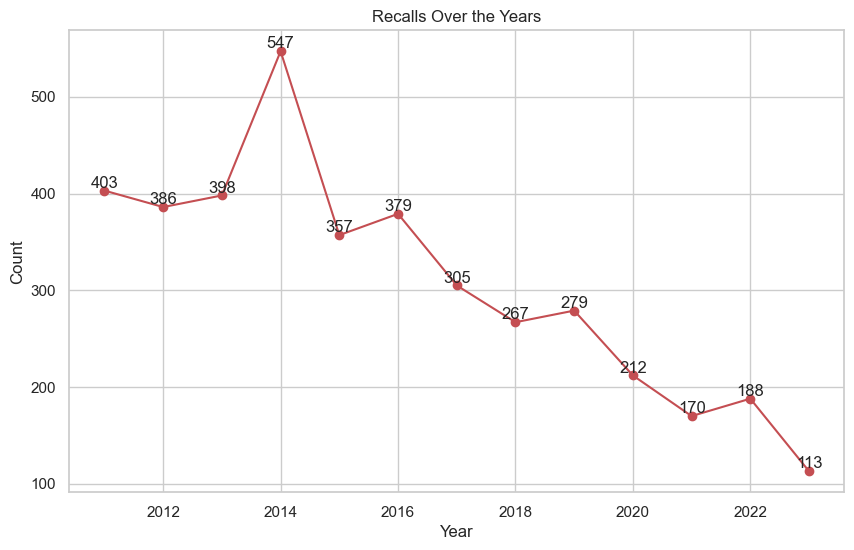

In [201]:
years = recalls_by_year['Year']
counts = recalls_by_year['Count']

plt.figure(figsize=(10, 6))
plt.plot(years, counts, marker='o', linestyle='-', color='r')

for i, count in enumerate(counts):
    plt.text(years.iloc[i], count, str(count), ha='center', va='bottom')
    
plt.title('Recalls Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Recall trends over the years:

- Overall Trend: The number of recalls has seen a general decline from 2014 to 2023. This suggests an improvement in product quality or safety measures over the years.

- Anomaly in 2022: There is a noticeable increase in recalls in 2022 compared to the previous few years. This could indicate a particular issue that year, possibly related to production or quality control.

- Decline in 2023: The number of recalls dropped significantly in 2023 compared to 2022. This might suggest that measures taken in response to the increase in 2022 were effective.

- Steady State: From 2016 to 2019, there is a stable number of recalls. This could mean that the company had established better quality control measures during this period.

- Potential Areas for Improvement: The years 2017 and 2018 had lower recall numbers, which could indicate that certain processes or measures implemented during this period were particularly effective.

##### Recalls by hazard

In [202]:
year_recalls = recalls.copy()

year_recalls['year'] = year_recalls['date'].dt.year
year_recalls['month'] = year_recalls['date'].dt.month_name()

year_recalls = year_recalls.groupby(['year', 'hazard_type'])['hazard_type'].size().to_frame()
year_recalls.rename(columns={'hazard_type': 'count'}, inplace=True)
year_recalls.reset_index(inplace=True)
year_recalls = year_recalls[year_recalls.hazard_type.isin(['Allergen', 'Chemical', 'Extraneous Material', 'Microbiological'])].sort_values(['year', 'count'])

In [204]:
year_recalls

,year,hazard_type,count
2,2011,Extraneous Material,45
1,2011,Chemical,46
5,2011,Microbiological,108
0,2011,Allergen,182
9,2012,Chemical,17
10,2012,Extraneous Material,45
14,2012,Microbiological,150
8,2012,Allergen,151
17,2013,Chemical,13
18,2013,Extraneous Material,33


In [205]:
year_recalls.to_csv('recalls_per_year_type.csv')

In [206]:
year_recalls = pd.read_csv("C:\\Users\\pushp\\recalls_per_year_type.csv")

In [207]:
year_recalls

,Unnamed: 0,year,hazard_type,count
0,2,2011,Extraneous Material,45
1,1,2011,Chemical,46
2,5,2011,Microbiological,108
3,0,2011,Allergen,182
4,9,2012,Chemical,17
5,10,2012,Extraneous Material,45
6,14,2012,Microbiological,150
7,8,2012,Allergen,151
8,17,2013,Chemical,13
9,18,2013,Extraneous Material,33


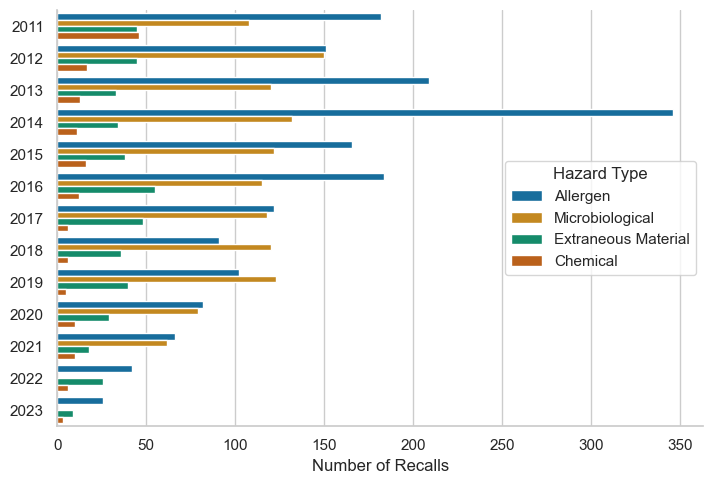

In [208]:
ax = sns.catplot(x='count', 
                 y='year', 
                 hue='hazard_type', 
                 kind='bar',
                 orient='h',
                 data=year_recalls, 
                 height=5, 
                 aspect=1.5,
                 hue_order=['Allergen', 'Microbiological', 'Extraneous Material', 'Chemical'],
                 legend=False,
                 palette='colorblind')
plt.xlabel('Number of Recalls')
plt.ylabel('')
plt.legend(title='Hazard Type')

In [209]:
#calculating the proportion of each hazard type
type_recalls = recalls['hazard_type'].value_counts(normalize=True).to_frame().reset_index().head()
type_recalls.sort_values('hazard_type', inplace=True, ascending=False)

In [210]:

diff = 1-type_recalls.hazard_type.sum()

In [211]:
type_recalls.iloc[4:5,1:2] = 0.025944 + diff
type_recalls

,index,hazard_type
0,Allergen,0.441808
1,Microbiological,0.311938
2,Extraneous Material,0.113886
3,Chemical,0.040210
4,Other,0.089381


In [212]:
type_recalls.to_csv('recalls_type.csv')

In [213]:
type_recalls = recalls['hazard_type'].value_counts(normalize=True).to_frame().reset_index()
type_recalls.columns = ['hazard_type', 'percentage']
type_recalls.sort_values('percentage', inplace=True, ascending=False)
type_recalls['percentage'] = type_recalls['percentage'] * 100

#filtering for specific hazard types
specific_hazard_types = ['Allergen', 'Microbiological', 'Extraneous Material', 'Food', 'Chemical']
type_recalls = type_recalls[type_recalls['hazard_type'].isin(specific_hazard_types)]

print(type_recalls)

            hazard_type  percentage
0              Allergen   44.180819
1       Microbiological   31.193806
2   Extraneous Material   11.388611
3              Chemical    4.020979
18                 Food    0.074925


In [214]:
recalls_clean = recalls.copy()
recalls_clean['hazard_explode'] = recalls_clean.hazard.str.split(',')
recalls_clean['distribution_explode'] = recalls_clean.distribution.str.split(',')

recalls_explode = recalls_clean.explode('hazard_explode').explode('distribution_explode').reset_index()

recalls_explode.drop(columns=['hazard', 'distribution'], inplace=True)
recalls_explode = recalls_explode.rename(columns={'level_0': 'index_clean', 'index':'index_links',
                                 'hazard_explode':'hazard', 'distribution_explode':'distribution'})

recalls_explode['hazard'] = recalls_explode.hazard.str.strip().str.capitalize()
recalls_explode['distribution'] = recalls_explode.distribution.str.strip()

In [215]:
# Selecting relevant columns
recalls_explode = recalls_explode[['index_clean', 'index_links', 'title',
                             'date','hazard_type', 'hazard', 'recall_class','audience',
                             'distribution','brand','product', 'company']]

In [216]:
#a text cleaning function by Matt Harrison
def generalize(ser, match_name, default=None, regex=False, case=False):
    """ Search a series for text matches.
    Based on code from https://www.metasnake.com/blog/pydata-assign.html

    ser: pandas series to search
    match_name: tuple containing text to search for and text to use for normalization
    default: If no match, use this to provide a default value, otherwise use the original text
    regex: Boolean to indicate if match_name contains a  regular expression
    case: Case sensitive search

    Returns a pandas series with the matched value

    """
    seen = None
    for match, name in match_name:
        mask = ser.str.contains(match, case=case, regex=regex)
        if seen is None:
            seen = mask
        else:
            seen |= mask
        ser = ser.where(~mask, name)
    if default:
        ser = ser.where(seen, default)
    else:
        ser = ser.where(seen, ser.values)
    return ser



distribution_patterns = [('Newfoundl', 'New Foundland and Labrador'),
                         ('Labrador', 'New Foundland and Labrador'),
                         ('Prince Edward Isl', 'Prince Edward Island'),
                         ('British Colombia', 'British Columbia')]

In [217]:
hazard_patterns = [('Yeasts', 'Quality/spoilage'), ('Yeast', 'Quality/spoilage'),
                   ('Walnuts', 'Walnut'), ('T?ree nuts', 'Tree nut'), ('Sulp?ites', 'Sulphites'),
                   ('Sanitizer residue', 'Sanitizer'), ('Rock', 'Rocks'),
                   ('Toxin patulin', 'Patulin'), ('Pistachios', 'Pistachio'),
                   ('Peanuts', 'Peanut'), ('Moulds', 'Quality/spoilage'), ('Mould', 'Quality/spoilage'),
                   ('Hazelnuts', 'Hazelnut'), ('Eggs', 'Egg'), ('Cashews', 'Cashew'),
                   ('Almonds', 'Almond')]

In [218]:
# Apply generalize function 
recalls_explode['distribution'] = generalize(recalls_explode['distribution'], distribution_patterns,  default=None, regex=True, case=False)

In [219]:
# Apply generalize function 
recalls_explode.hazard.fillna('', inplace=True)
recalls_explode['hazard'] = generalize(recalls_explode['hazard'], hazard_patterns,  default=None, regex=True, case=False)
recalls_explode.shape

(8689, 12)

In [220]:
recalls_explode.head(3)

,index_clean,index_links,title,date,hazard_type,hazard,recall_class,audience,distribution,brand,product,company
0,0,4116,Certain Safie's brand Sweet Pickled Beets may ...,2011-12-30,Extraneous Material,Glass,Class 2,Retail,Alberta,Certain Safie's,Certain safie's,Costco Wholesale Canada Inc.
1,0,4116,Certain Safie's brand Sweet Pickled Beets may ...,2011-12-30,Extraneous Material,Glass,Class 2,Retail,British Columbia,Certain Safie's,Certain safie's,Costco Wholesale Canada Inc.
2,0,4116,Certain Safie's brand Sweet Pickled Beets may ...,2011-12-30,Extraneous Material,Glass,Class 2,Retail,Manitoba,Certain Safie's,Certain safie's,Costco Wholesale Canada Inc.


In [221]:
allergen = recalls_explode[recalls_explode['hazard_type'] == 'Allergen']
allergen = allergen.hazard.value_counts(normalize=True).to_frame().reset_index()
allergen = allergen.sort_values('hazard', ascending=False).head(11)
allergen

,index,hazard
0,Milk,0.261553
1,Egg,0.123856
2,Wheat,0.090547
3,Sulphites,0.078114
4,Mustard,0.068731
5,Peanut,0.056768
6,Gluten,0.051372
7,Soy,0.047854
8,Sesame,0.039643
9,Almond,0.034248


In [222]:
allergen.to_csv('allergen-top.csv')

In [223]:
micro = recalls_explode[recalls_explode['hazard_type'] == 'Microbiological']
micro = micro.hazard.value_counts(normalize=True).to_frame().reset_index()
micro = micro.sort_values('hazard', ascending=False).head(5)
micro

,index,hazard
0,Listeria monocytogenes,0.258980
1,Salmonella,0.221729
2,Quality/spoilage,0.101996
3,E. coli o157:h7,0.097561
4,E. coli,0.074058


In [224]:
micro.to_csv('micro-top.csv')

In [225]:
phys = recalls_explode[recalls_explode['hazard_type'] == 'Extraneous Material']

In [226]:
phys = recalls_explode[recalls_explode['hazard_type'] == 'Extraneous Material']
phys = phys.hazard.value_counts(normalize=True).to_frame().reset_index()
phys.sort_values('hazard', ascending=False).head(11)

,index,hazard
0,Extraneous material,0.207568
1,Metal,0.203243
2,Insects,0.176216
3,Glass,0.141622
4,Plastic,0.117838
5,Bone,0.031351
6,Wood,0.018378
7,Stones,0.018378
8,Rubber,0.010811
9,Rocks,0.007568


In [227]:
chem = recalls_explode[recalls_explode['hazard_type'] == 'Chemical']
chem.tail(5)

,index_clean,index_links,title,date,hazard_type,hazard,recall_class,audience,distribution,brand,product,company
8393,3866,291,JLF Foods Ltd. brand frozen white shrimp recal...,2022-02-02,Chemical,Chemical,Class 3,Hotel/Restaurant/Institutional,Jlf Foods Ltd Br Frozen White Shrimp Recalled ...,JLF Foods Ltd.,Frozen white shrimp,"Hotels, restaurants and institutions"
8439,3892,1,Mateína brand Yerba Mate Sparkling Energy Infu...,2023-08-11,Chemical,Chemical,NaN,General public,The Affected Products Are Being Recalled From ...,Mateína,Yerba mate sparkling energy infusions,Quebec
8515,3929,40,G Fuel brand Energy Drinks recalled due to hig...,2023-05-30,Chemical,Chemical,NaN,General public,Nationally,G Fuel,Energy drinks,Retail
8682,4000,112,Punjab King brand Pure Honey recalled due to p...,2023-01-13,Chemical,Contamination,Class 3,Retail,Ontario,Punjab King,Pure honey,Retail
8683,4000,112,Punjab King brand Pure Honey recalled due to p...,2023-01-13,Chemical,Contamination,Class 3,Retail,Quebec,Punjab King,Pure honey,Retail


In [228]:
chem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 23 to 8683
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   index_clean   344 non-null    int64         
 1   index_links   344 non-null    int64         
 2   title         344 non-null    object        
 3   date          344 non-null    datetime64[ns]
 4   hazard_type   344 non-null    object        
 5   hazard        344 non-null    object        
 6   recall_class  341 non-null    object        
 7   audience      344 non-null    object        
 8   distribution  344 non-null    object        
 9   brand         299 non-null    object        
 10  product       333 non-null    object        
 11  company       341 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 34.9+ KB


In [229]:
chem = recalls_explode[recalls_explode['hazard_type'] == 'Chemical']
chem = chem.hazard.value_counts(normalize=True).to_frame().reset_index()

chem.sort_values('hazard', ascending=False).head(11)

,index,hazard
0,,0.098837
1,Chemical additives,0.063953
2,Drug residues,0.061047
3,Chemical residues,0.046512
4,Sanitizer,0.046512
5,Phthalates,0.043605
6,Aflatoxin,0.037791
7,Histamine,0.037791
8,Tin,0.034884
10,Patulin,0.031977


In [230]:
recalls_explode.hazard.value_counts().head()

Milk                      1115
Listeria monocytogenes     613
Egg                        529
Salmonella                 527
Wheat                      386
Name: hazard, dtype: int64

In [231]:
#grabbing the regions for analysis
dist = recalls_explode.distribution.value_counts().to_frame()
dist.head(15)

,distribution
Ontario,1828
Nationally,1250
British Columbia,1070
Quebec,1018
Alberta,1001
Manitoba,571
Saskatchewan,491
Nova Scotia,367
New Brunswick,323
New Foundland and Labrador,212


In [232]:
dist = dist[dist.index.isin(['Ontario', 'British Columbia',
                     'Quebec', 'Alberta', 'Manitoba',
                     'Saskatchewan', 'Nova Scotia', 
                     'New Brunswick', 'New Foundland and Labrador',
                     'Prince Edward Island', 'Yukon',
                     'Northwest Territories', 'Nunavut'])]
dist['distribution'] = dist['distribution'] + 1212

In [233]:
dist.to_csv('recalls-distribution.csv')

In [235]:
recalls.audience.value_counts().head(10)

Retail                                       3136
Hotel/Restaurant/Institutional                287
Consumer                                      203
Retail, Hotel/Restaurant/Institutional         89
Class 1                                        70
General public                                 50
Warehouse                                      49
Class 2                                        38
Retail and Hotel/Restaurant/Institutional      32
Hotel/Restaurant/Institutional, Retail         14
Name: audience, dtype: int64